# W3 - Graphs & Fields

In this workshop we will learn about graphs & fields, and explore their application in configuration design.

## 0. Initialization

In [1]:
import networkx as nx 
import numpy as np
import topogenesis as tg
import pandas as pd
from IPython.display import display
import pyvista as pv

## 1. Graphs

### 1.1. Basic Graph

In [2]:
G_nodes = [0, 1, 2, 3, 4]
G_edges = [ (0, 1),
            (0, 3),
            (1, 2),
            (1, 3),
            (2, 3),
            (2, 4),
            (0, 4)]

G = nx.Graph()
G.add_nodes_from(G_nodes)
G.add_edges_from(G_edges)

### 1.2. Graph drawing

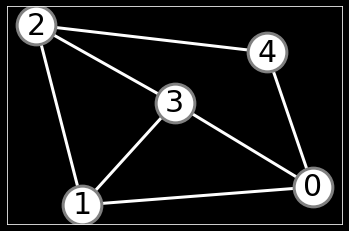

In [3]:
# explicitly set positions
pos = { 
    0: (5, 0.03),
    1: (0, 0), 
    2: (-1, 0.3), 
    3: (2, 0.17), 
    4: (4, 0.255)}

options = {
    "font_size": 30,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "grey",
    "edge_color": "white",
    "linewidths": 3,
    "width": 3,
}
nx.draw_networkx(G, pos, **options)

### 1.3. Vertex - Vertex Matrix

In [4]:
# VV is a matrix with this shape: number of nodes by number of nodes
VV_shape = (len(G_nodes), len(G_nodes))
# Initialize the empty VV
VV = np.zeros(VV_shape, dtype=int)
# iterate over the egdes
for n1, n2 in G_edges:
    # since the graph is undrirected we fill the matrix 
    # on both side of the diagonal line
    VV[n1, n2] = 1 
    VV[n2, n1] = 1

# display as pandas dataframe
display(pd.DataFrame(VV))

,0,1,2,3,4
0,0,1,0,1,1
1,1,0,1,1,0
2,0,1,0,1,1
3,1,1,1,0,0
4,1,0,1,0,0


### 1.4. Edge - Vertex Matrix

In [5]:
# EV is a matrix with this shape: number of edges by number of nodes
EV_shape = (len(G_edges), len(G_nodes))
# Initialize the empty EV
EV = np.zeros(EV_shape, dtype=int)
# iterate over the edges
for e, (n1, n2) in enumerate(G_edges):
    # set each element at row e and column n1, n2 to 1
    EV[e, n1] = 1 
    EV[e, n2] = 1 

# display as pandas dataframe (tag edges in index for readability)
pd.DataFrame(EV, index=G_edges)

,0,1,2,3,4
"(0, 1)",1,1,0,0,0
"(0, 3)",1,0,0,1,0
"(1, 2)",0,1,1,0,0
"(1, 3)",0,1,0,1,0
"(2, 3)",0,0,1,1,0
"(2, 4)",0,0,1,0,1
"(0, 4)",1,0,0,0,1


### 1.5. Edge - Edge Matrix 

In [6]:
# EE is a matrix with this shape: number of edges by number of edges
EE_shape = (len(G_edges), len(G_edges))
# Initialize the empty EE
EE = np.zeros(EE_shape, dtype=int)
# iterate over the edges
for e1 ,(n11, n12) in enumerate(G_edges):
    # for each edge, iterate over the edges
    for e2 ,(n21, n22) in enumerate(G_edges):
        # if they shared any node... (Q+): how are we checking that? in what situation this method will not work properly?
        if (n11-n21) * (n11-n22) * (n12-n21) * (n12-n22) == 0:
            # set those edges as adjacent
            EE[e1, e2] = 1

# subtract the identity matrix since each edge does have nodes in common 
# with itself, but is not considered adjacent to itself
EE -= np.identity(len(G_edges), dtype=int)
# display as pandas dataframe (tag edges in index and columns for readability)
pd.DataFrame(EE, index=G_edges, columns=G_edges)

,"(0, 1)","(0, 3)","(1, 2)","(1, 3)","(2, 3)","(2, 4)","(0, 4)"
"(0, 1)",0,1,1,1,0,0,1
"(0, 3)",1,0,0,1,1,0,1
"(1, 2)",1,0,0,1,1,1,0
"(1, 3)",1,1,1,0,1,0,0
"(2, 3)",0,1,1,1,0,1,0
"(2, 4)",0,0,1,0,1,0,1
"(0, 4)",1,1,0,0,0,1,0


### 1.6. Vertex-Vertex Matrixc in networkx

In [7]:
# you can also extract the VV matrix from networkx.
# notice the nodelist property, it specifies the order 
# of nodes in the rows and columns of the matrix
VV_ = nx.linalg.graphmatrix.adjacency_matrix(G, nodelist=G_nodes)
# convert sparse matrix to dense matrix and display it with pandas
pd.DataFrame(VV_.todense())

,0,1,2,3,4
0,0,1,0,1,1
1,1,0,1,1,0
2,0,1,0,1,1
3,1,1,1,0,0
4,1,0,1,0,0


### 1.7. Activity Relationship Chart (ARC)

In [8]:
# TODO explain Activity Relationship Chart (REL Chart) 
# https://en.wikipedia.org/wiki/Activity_relationship_chart

## 2. Fields

### 2.1. Construct a lattice

In [32]:
# import the streetnetwork as a point cloud
street_network_pc = tg.cloud_from_csv("../data/streetnetwork_pointcloud.csv")

# construct the lattice from voxelating the point cloud 
street_network_lattice = street_network_pc.voxelate([12, 12, 12], closed=True)

In [33]:
street_network_lattice.shape

(142, 93, 3)

### 2.2. Visualize the lattice

In [34]:
# initiating the plotter
p = pv.PlotterITK() # ITK plotter for interactivity within the python notebook (itkwidgets library is required)

# fast visualization of the point cloud
street_network_pc.fast_notebook_vis(p)

# fast visualization of the lattice
street_network_lattice.fast_notebook_vis(p, show_outline=True, show_centroids=True)

# Set a camera position
p.camera_position = [(0.25, 0.18, 0.5), (0, .1, 0), (0, 1, 0)]

# plotting
p.show()

Viewer(camera=array([[0.25, 0.18, 0.5 ],
       [0.  , 0.1 , 0.  ],
       [0.  , 1.  , 0.  ]], dtype=float32)…

Viewer(camera=array([[0.25, 0.18, 0.5 ],
       [0.  , 0.1 , 0.  ],
       [0.  , 1.  , 0.  ]], dtype=float32)…

### 2.3. Construct distance field

In [12]:
# TODO Explain poincare duality on lattices
# TODO Explain shortest distance
# TODO Construct the distance lattice

## 3. Spatial Networks

## Credits

In [13]:
__author__ = "Shervin Azadi"
__license__ = "MIT"
__version__ = "1.0"
__url__ = "https://github.com/shervinazadi/earthy_workshops"
__summary__ = "Earthy Design Studio"